In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib notebook
import tensorflow as tf
import os

import time

In [2]:
def load_tf_scalar(folder, tag):
    time0 = time.time()

    steps = []
    h = []
    for file in sorted(os.listdir(folder)):
        try:
            for e in tf.train.summary_iterator(folder + file):
                for v in e.summary.value:
                    if v.tag == tag:
                        h.append(v.simple_value)
                        steps.append(e.step)
        except tf.errors.DataLossError:
            print('DataLossError')
            pass
    
    print('Took this many seconds: ', time.time() - time0)
    return steps, h

In [3]:
def load_tb_all(folder):
    time0 = time.time()

    data_dict = {}
    for file in sorted(os.listdir(folder)):
        try:
            for e in tf.train.summary_iterator(folder + file):
                for v in e.summary.value:
                    if v.tag not in data_dict.keys():
                        data_dict[v.tag] = [[], []]
                    data_dict[v.tag][0].append(e.step)
                    data_dict[v.tag][1].append(v.simple_value)
        except tf.errors.DataLossError:
            print('DataLossError')
            pass
    
    print('Took this many seconds: ', time.time() - time0)
    return data_dict

In [4]:
plt.style.use('ggplot')

<IPython.core.display.Javascript object>


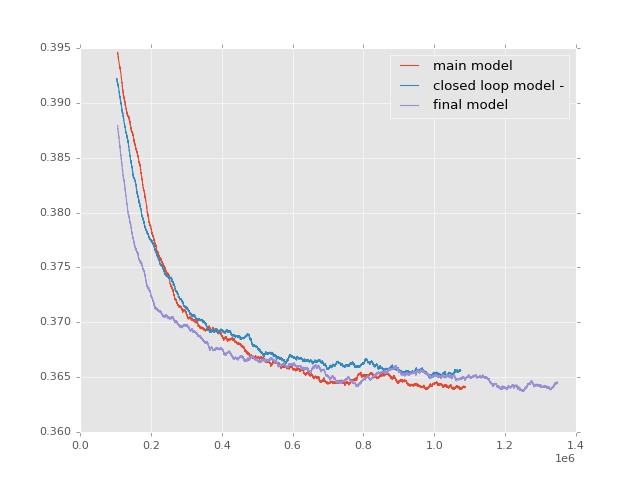

In [5]:
fig_loss, ax_loss = plt.subplots()

In [6]:
aliases = {"slither-AE-LSTM-final-bl": "feedforward baseline",
            "slither-AE-LSTM-final-n": "recurrent baseline",
            "slither-AE-LSTM-final-e2e": "main model",
            "slither-AE-LSTM-final-e2e-c2d": "residual model",
            "slither-AE-LSTM-final-e2e-d2d": "residual model, error input",
            "slither-AE-LSTM-final-e2e-aim": "closed loop model +",
            "slither-AE-LSTM-final-e2e-sim": "closed loop model -",
            "slither-AE-LSTM-final-e2e-final": "final model",
}


In [7]:
load_ids = [
#             "./tb_final/slither-AE-LSTM-final-bl/",
#             "./tb_final/slither-AE-LSTM-final-n/",
            "./tb_final/slither-AE-LSTM-final-e2e/",
#             "./tb_final/slither-AE-LSTM-final-e2e-c2d/",
#             "./tb_final/slither-AE-LSTM-final-e2e-d2d/",
#             "./tb_final/slither-AE-LSTM-final-e2e-aim/",
            "./tb_final/slither-AE-LSTM-final-e2e-sim/",
#             "./tb_final/slither-AE-LSTM-final-e2e-d2d-reg/",
#             "./tb_final/slither-AE-LSTM-final-e2e-aio/"
           ]
load_dict = {}

for load_id in load_ids[:]:
    h = load_tf_scalar(load_id, 'loss')
    load_dict[load_id.split("/")[2]] = h

DataLossError
Took this many seconds:  51.62051343917847
DataLossError
Took this many seconds:  21.49840784072876


In progress

In [8]:
load_id = "./tb_final/slither-AE-LSTM-final-e2e-final/"
h = load_tf_scalar(load_id, 'loss')
load_dict[load_id.split("/")[2]] = h

DataLossError
DataLossError
DataLossError
DataLossError
Took this many seconds:  14.415255308151245


In [9]:
xfmt = plt.ScalarFormatter()
xfmt.set_powerlimits((-3,3))

line_dict = {}

ax_loss.cla()
for name, h in load_dict.items():
    steps, h = h
    
    window = 2**min(int(math.log(len(h)/1, 2)), 13)
    conv_h = np.convolve(h, np.ones(window)/window, mode='valid')
    line, = ax_loss.plot(steps[len(steps) - len(conv_h):], conv_h, label=aliases[name])
    line_dict[name] = line
    
l = ax_loss.legend()

# ax_loss.set_xlim(right=1e6)
ax_loss.xaxis.set_major_formatter(xfmt)